In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap

# Load your dataset (replace 'your_dataset.csv' with your file)
data = pd.read_csv("american_bankruptcy.csv").head(5000)
data.head()


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


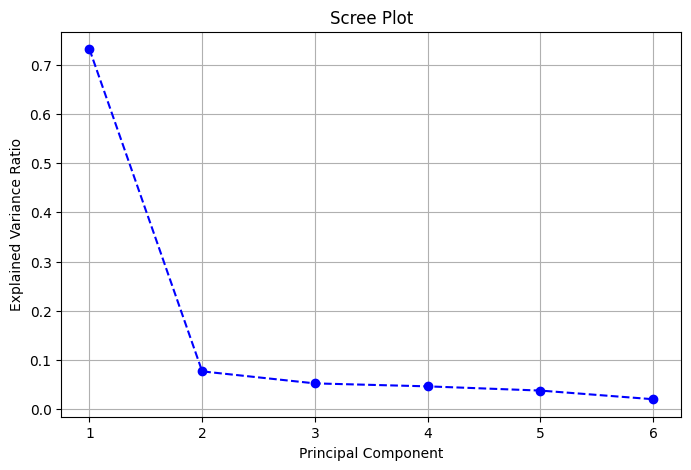

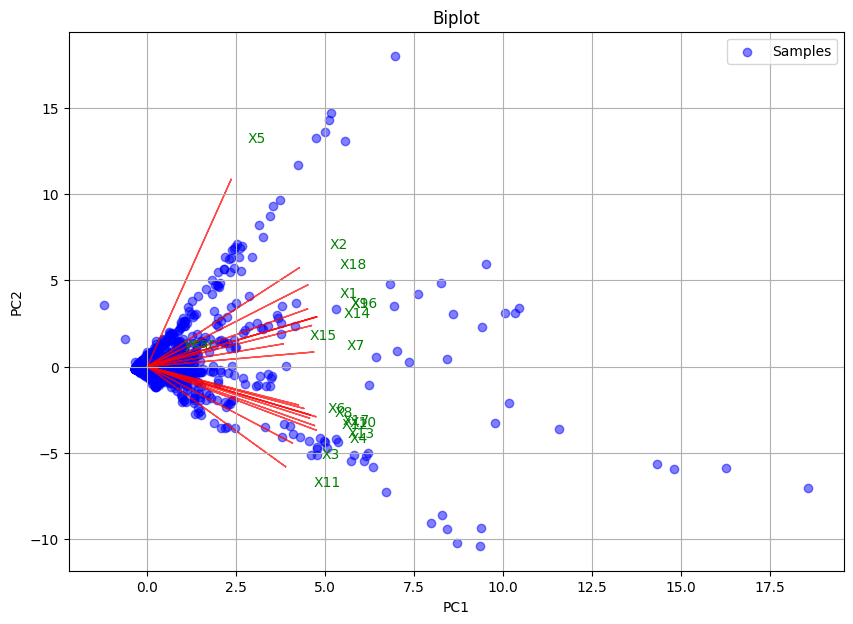

In [6]:


# Extract numeric columns for PCA (excluding non-numeric like 'company_name' and 'status_label')
numeric_cols = data.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Perform PCA
pca = PCA( n_components=0.95,whiten=True,svd_solver='auto',)
pca_data = pca.fit_transform(scaled_data)

# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Biplot Function
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    plt.figure(figsize=(10, 7))
    plt.scatter(xs, ys, alpha=0.5, c='blue', label='Samples')
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0]*max(xs), coeff[i, 1]*max(ys),
                  color='red', alpha=0.7, head_width=0.02)
        if labels is None:
            plt.text(coeff[i, 0]*max(xs)*1.2, coeff[i, 1]*max(ys)*1.2, f"Var{i+1}", color='green')
        else:
            plt.text(coeff[i, 0]*max(xs)*1.2, coeff[i, 1]*max(ys)*1.2, labels[i], color='green')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.legend()
    plt.title('Biplot')
    plt.show()

# Generate the biplot
biplot(pca_data, np.transpose(pca.components_), labels=numeric_cols.columns)




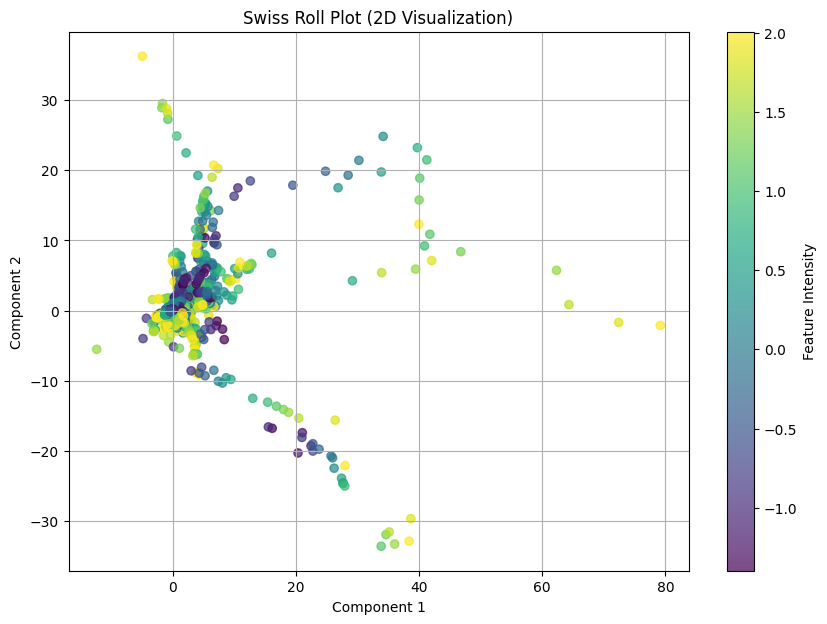

In [9]:


# Swiss Roll Plot (using Isomap for 2D embedding visualization)
isomap_2d = Isomap(n_neighbors=min(10, len(data)-1), n_components=2)
isomap_2d_data = isomap_2d.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
plt.scatter(isomap_2d_data[:, 0], isomap_2d_data[:, 1], c=scaled_data[:, 0], cmap='viridis', alpha=0.7)
plt.title('Swiss Roll Plot (2D Visualization)')
plt.colorbar(label='Feature Intensity')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.show()


